In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sys 
sys.path.append("../../") 
from compare_algorithms.utils import create_dataset
%matplotlib notebook

In [2]:
filename = '../../data/week_data/data/washingtong_autumn_20121001-20121007新.csv'
x_train, y_train, x_test, y_test = create_dataset(filename,seq_len=9)

In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((711, 9), (711,), (288, 9), (288,))

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
# 网格化搜索寻找最优参数
svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1,verbose=True),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)

In [6]:
# svr = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1, verbose=True)

In [7]:
svr.fit(x_train, y_train)

[LibSVM]*
optimization finished, #iter = 493
obj = -122.997955, rho = -12.336554
nSV = 377, nBSV = 361
[LibSVM]*
optimization finished, #iter = 395
obj = -158.543979, rho = -11.038796
nSV = 359, nBSV = 337
[LibSVM]*
optimization finished, #iter = 421
obj = -165.614275, rho = -10.802995
nSV = 362, nBSV = 343
[LibSVM]*
optimization finished, #iter = 469
obj = -182.029411, rho = -11.041143
nSV = 397, nBSV = 379
[LibSVM]*
optimization finished, #iter = 452
obj = -179.297385, rho = -11.135501
nSV = 386, nBSV = 365
[LibSVM]*
optimization finished, #iter = 896
obj = -108.339576, rho = -12.330725
nSV = 357, nBSV = 285
[LibSVM]*
optimization finished, #iter = 894
obj = -198.092428, rho = -10.778218
nSV = 355, nBSV = 278
[LibSVM]*
optimization finished, #iter = 833
obj = -202.296658, rho = -10.798414
nSV = 365, nBSV = 291
[LibSVM]*
optimization finished, #iter = 821
obj = -224.763296, rho = -11.083774
nSV = 391, nBSV = 311
[LibSVM]*
optimization finished, #iter = 808
obj = -223.917704, rho = -11

[LibSVM].................................................................*........................................................................*
optimization finished, #iter = 137313
obj = -42219.900204, rho = -14.091541
nSV = 328, nBSV = 222
[LibSVM].....................................................................................................*.........................................................................................*......................*
optimization finished, #iter = 211508
obj = -31233.093121, rho = -13.559067
nSV = 297, nBSV = 173
[LibSVM].............................................................................................*.................................................................*...............................................*
optimization finished, #iter = 204730
obj = -42318.267587, rho = -13.417002
nSV = 316, nBSV = 193
[LibSVM]................................................................................................*............

GridSearchCV(estimator=SVR(gamma=0.1, verbose=True),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [8]:
svr_predict = svr.predict(x_test)

<IPython.core.display.Javascript object>


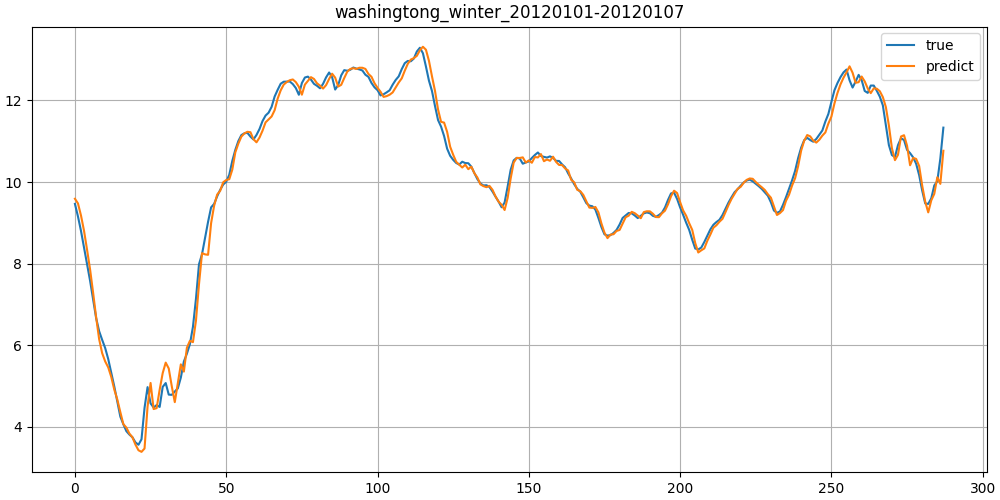

In [13]:
#  画出预测的图像，第二幅图为预测的图像，把缺失的数据补上
fig,ax = plt.subplots(figsize=(10, 5),layout='constrained')
ax.set_title("washingtong_winter_20120101-20120107")
ax.plot(y_test,label='true')
ax.plot(svr_predict,label='predict')
ax.grid()
ax.legend()
plt.show()

In [14]:
def cal_mse(y_hat, y):
    mse = (np.square(y_hat - y)).mean()
    return mse

In [15]:
mse = cal_mse(svr_predict, y_test)
mse

0.03948186620121412

In [16]:
df = pd.DataFrame(data={
                'true_value': y_test,
                'predict': svr_predict
            })
df.to_csv("result/washingtong_autumn_20121001-20121007.csv", index=False)